In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


In [2]:
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ')
regex_unwantend = re.compile(r"[,\-'\n]")
regex_other_punctuation = re.compile(r'[:;!?—]')
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7617
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 295
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [3]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

for sentence in sentences:
    print(sentence)
    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()
words = [w.strip().lower() for w in words if w.strip()]
words = list(set(words))
print(words)

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
and i pray the being who always was of old and has now been by me revealed to grant that my words may endure in so far as they have been spoken truly and acceptably to him
but if unintentionally i have said anything wrong i pray that he will impose upon me a just retribution and the just retribution of him who errs is that he should be set right
wishing then to speak truly in future concerning the generation of the gods i pray him to give me knowledge which of all medicines is the most perfect and best
and now having offered my prayer i deliver up the argument to critias who is to speak next according to our agreement
and i timaeus accept the trust and as you at first said that you were going to speak of high matters and begged that some forbearance might be shown to you i too ask the same or greater forbearance for what i am about to say
and although i very well know t

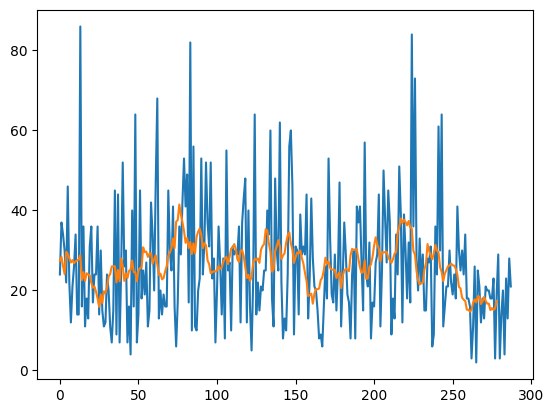

In [4]:
# print sentence length over time
sentence_lengths = [len(s.split()) for s in sentences]
plt.plot(sentence_lengths)
# print rolling average of sentence length
lookback = 10
rolling_average = np.convolve(sentence_lengths, np.ones(lookback)/lookback, mode='valid')
plt.plot(rolling_average)

In [5]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word not in stopwords_list]

# stem words
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
stemmed_words = list(set(stemmed_words))


[nltk_data] Downloading package stopwords to /home/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# select which words to use
relevant_words = filtered_words

In [38]:
# get term sentence matrix
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i, sentence in enumerate(sentences):
    for j, word in enumerate(relevant_words):
        term_sentence_matrix[j, i] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i in range(len(sentences)):
    normalized_term_sentence_matrix[:,i] = term_sentence_matrix[:,i] / np.linalg.norm(term_sentence_matrix[:,i])


print(term_sentence_matrix.shape)


(1595, 288)


In [42]:
# verify term sentence matrix
sentence_index = 0
print(sentences[sentence_index])

print("----")
for i, word in enumerate(relevant_words):
    if normalized_term_sentence_matrix[i, sentence_index] > 0:
        print(word, normalized_term_sentence_matrix[i, sentence_index])
        

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
----
last 0.30151134457776363
journey 0.30151134457776363
weary 0.30151134457776363
socrates 0.30151134457776363
like 0.30151134457776363
arrived 0.30151134457776363
rest 0.30151134457776363
long 0.30151134457776363
traveller 0.30151134457776363
thankful 0.30151134457776363
may 0.30151134457776363


In [43]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix)
rank = 20
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank])
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank
print(term_sentence_matrix_rank)

[[ 0.0001346  -0.00054477 -0.00063437 ... -0.0018651  -0.00127227
   0.00065789]
 [ 0.00083101  0.00295518  0.00104581 ... -0.00036226 -0.00029962
   0.0003929 ]
 [ 0.00274013  0.03401267 -0.00632664 ...  0.00848975  0.02566216
   0.01220468]
 ...
 [-0.00061095  0.0014483  -0.00142349 ...  0.00073094  0.0018232
   0.00029351]
 [-0.00380464  0.00124767 -0.00158859 ...  0.01177434 -0.01056104
  -0.01074635]
 [ 0.00117198 -0.00175188 -0.00062557 ...  0.00085756 -0.0004078
   0.0057824 ]]


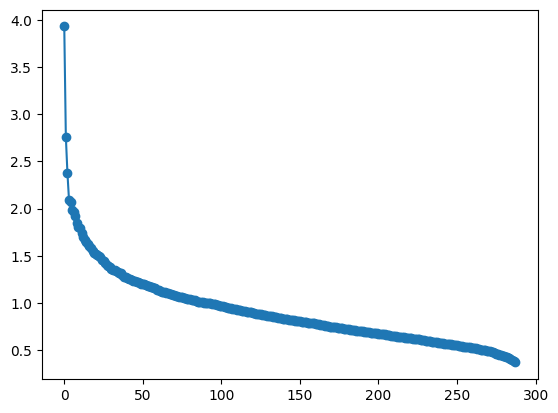

In [44]:
# plot singular values
plt.plot(s, 'o-')

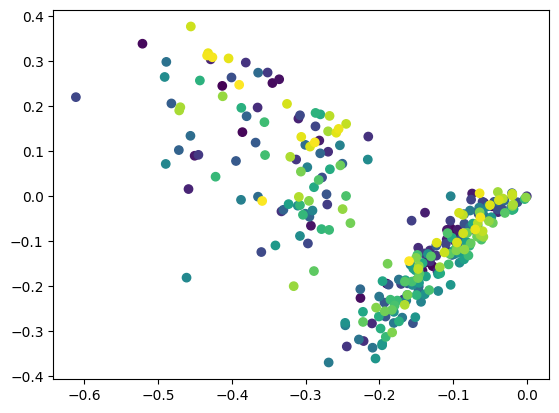

In [45]:
# use singular vecotrs for 2D representation of sentences
v1 = U_rank[:, 0]
v2 = U_rank[:, 1]
dataX1= np.dot(v1, normalized_term_sentence_matrix)
dataX2= np.dot(v2, normalized_term_sentence_matrix)
plt.scatter(dataX1, dataX2, c=np.arange(len(sentences)), cmap='viridis')


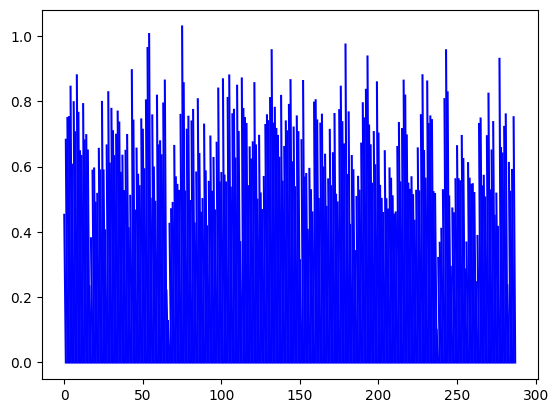

In [46]:
import matplotlib.pyplot as plt
# plot the distance between two consecutive sentences
for i in range(len(sentences)-1):
    plt.plot([i, i+1], [np.linalg.norm(term_sentence_matrix_rank[:, i] - term_sentence_matrix_rank[:, i+1]), 0], "b")

In [47]:
# implement k-means clustering
def kmeans(X, k, max_iter=100):
    n, d = X.shape
    # initialize the centroids from seed
    np.random.seed(6)
    centroids = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        # assign each point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        # update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels



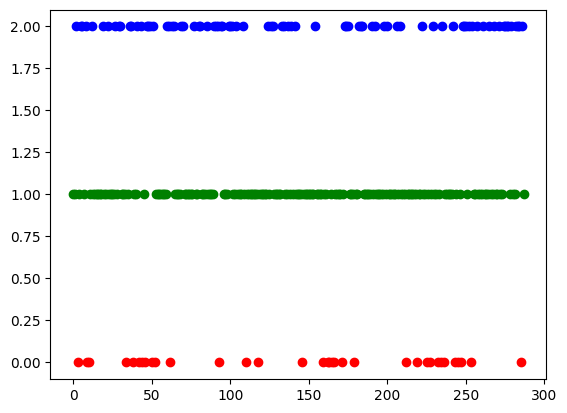

In [48]:
# plot the data with the k-means clustering
number_of_clusters = 3
labels = kmeans(term_sentence_matrix_rank.T, number_of_clusters)
colors = ['r', 'g', 'b','y','orange', 'purple']
for i in range(len(sentences)):
    plt.scatter(i, labels[i], color=colors[labels[i]])
# legend

In [49]:
# get "topics" from centroids
centroids = []
for label in range(number_of_clusters):
    centroids.append(np.mean(term_sentence_matrix_rank.T[labels == label], axis=0))

for i, centroid in enumerate(centroids):
    print("Topic", i)
    # print top 10 words
    for word, value in sorted(zip(relevant_words, centroid), key=lambda x: x[1], reverse=True)[:10]:
        print(word, value)

Topic 0
go 0.24703490127850122
god 0.14791669301585997
men 0.0997049655945776
gods 0.09120612331321479
old 0.0840029527346451
temple 0.07007812695147127
king 0.05016246132163341
gold 0.04932581465847038
place 0.03855827930066159
see 0.037087311778266796
Topic 1
art 0.047682643905383175
land 0.0423974946312723
man 0.041246770617933574
red 0.04121070372849373
one 0.04080343322001845
men 0.037892141828954465
din 0.03687420695780241
ran 0.03201975728963089
king 0.030738972987772065
tin 0.02919671656466847
Topic 2
us 0.3316961123576015
use 0.056899854000258
men 0.03615242317689608
let 0.0342942141242533
man 0.03167502715329054
aid 0.030692068924006277
ten 0.0299689367939683
one 0.029772930014765303
timaeus 0.028825871122762275
must 0.02689534598647124


In [50]:
# calculate saliency scores
AAT=term_sentence_matrix_rank @term_sentence_matrix_rank.T
ATA= term_sentence_matrix_rank.T @ term_sentence_matrix_rank
u=np.linalg.eig(AAT).eigenvectors[0]
print(u.shape)
v=np.linalg.eig(ATA).eigenvectors[0]
print(v.shape)


(1595,)
(288,)


In [51]:
# show most salient words
word_saliency = {}
for i, word in enumerate(relevant_words):
    word_saliency[word] = np.linalg.norm(u[i])

print("saliency of atlantis:" , word_saliency["atlantis"])
for word in sorted(word_saliency, key=word_saliency.get, reverse=True)[:50]:
    print(word_saliency[word],"\t", word)


saliency of atlantis: 0.0005754056262650963
0.33927285818693836 	 painting
0.05983018216590047 	 people
0.05983018216590047 	 richer
0.034491622242023026 	 regulated
0.034491622242023026 	 trust
0.019248306061273122 	 raised
0.019248306061273122 	 swore
0.015201446351060539 	 sworn
0.015201446351060539 	 appear
0.01390550615119584 	 guardians
0.01390550615119584 	 point
0.013445449551370508 	 temples
0.013176718675098202 	 days
0.013176718675098202 	 power
0.012769501434609712 	 approved
0.011602549688401801 	 custom
0.011602549688401801 	 clearer
0.010879171971608146 	 consulted
0.010253598681647689 	 extraordinary
0.009641665019030592 	 supremacy
0.009641665019030592 	 anything
0.009601136736141618 	 waves
0.009601136736141618 	 artificial
0.009056659028560492 	 far
0.0076015010420249175 	 bowl
0.006361263455813438 	 civilizations
0.006359978883097041 	 side
0.006359978883097041 	 attempted
0.0062932467127102465 	 pilots
0.0062932467127102465 	 gratification
0.005432609823522822 	 sq

In [52]:
# show most salient sentences
sentence_saliency = {}
for i, sentence in enumerate(sentences):
    sentence_saliency[sentence] = np.linalg.norm(v[i])
for sentence in sorted(sentence_saliency, key=sentence_saliency.get, reverse=True):
    print(sentence_saliency[sentence])
    print(sentence)
    print("-----------------")

0.17116189845537097
and so atlantis once a beacon of glory became a lesson to all generations about the importance of humility wisdom and adherence to divine law
-----------------
0.17116189845537097
this concludes the story i have to tell as it was handed down from solon and the priests of egypt and now recounted to you as best as memory serves
-----------------
0.16842818893674213
they were moved by his words and by the fate of the once noble atlanteans who had strayed so far from their divine heritage
-----------------
0.16677457203079898
the stories we tell and the knowledge we share are the threads that weave the fabric of our understanding
-----------------
0.16677457203079898
with this in mind i am ready to take my turn and delve into the matters that concern us confident in the support and forbearance of this esteemed company
-----------------
0.15543298785979556
socrates i am honored by your words and the eloquence of my predecessors
-----------------
0.15543298785979556
the t